# Linear Regression Notebook
This will use PyTorch to perform Linear Regression

In [16]:
import torch
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [17]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [2]:
df = pd.read_csv("social_media-GB-monthly-201301-202301.csv")

In [3]:
df.head()

,Date,Facebook,Twitter,Pinterest,Tumblr,Instagram,reddit,StumbleUpon,YouTube,LinkedIn,Google+,VKontakte,news.ycombinator.com,Fark,Digg,Other
0,2013-01,63.21,17.49,3.69,0.0,0.0,3.55,7.48,3.75,0.44,0.01,0.01,0.11,0.03,0.03,0.22
1,2013-02,60.88,19.06,4.41,0.0,0.0,3.67,6.98,3.99,0.43,0.23,0.02,0.11,0.02,0.02,0.19
2,2013-03,59.06,20.26,4.54,0.0,0.0,3.93,6.82,4.34,0.41,0.36,0.01,0.04,0.03,0.02,0.19
3,2013-04,61.46,19.88,4.02,0.0,0.0,3.75,6.90,3.01,0.38,0.35,0.01,0.00,0.03,0.05,0.17
4,2013-05,61.95,19.34,3.69,0.0,0.0,4.53,6.93,2.75,0.34,0.24,0.03,0.00,0.02,0.02,0.16


In [4]:
df_facebook = df[['Facebook', 'Date']]

In [5]:
df_facebook.head()

,Facebook,Date
0,63.21,2013-01
1,60.88,2013-02
2,59.06,2013-03
3,61.46,2013-04
4,61.95,2013-05


In [6]:
dates = df_facebook['Date']

In [7]:
print(dates)

0      2013-01
1      2013-02
2      2013-03
3      2013-04
4      2013-05
        ...   
116    2022-09
117    2022-10
118    2022-11
119    2022-12
120    2023-01
Name: Date, Length: 121, dtype: object


In [8]:
dates_to_datetime = pd.to_datetime(dates)
dates_to_datetime = dates_to_datetime.map(dt.datetime.toordinal)

In [9]:
print(dates_to_datetime)

0      734869
1      734900
2      734928
3      734959
4      734989
        ...  
116    738399
117    738429
118    738460
119    738490
120    738521
Name: Date, Length: 121, dtype: int64


In [10]:
facebook_data = df_facebook['Facebook'].to_numpy()

In [12]:
facebook_data_tensor = torch.from_numpy(facebook_data).type(torch.float32)

In [13]:
print(facebook_data_tensor)

tensor([63.2100, 60.8800, 59.0600, 61.4600, 61.9500, 62.6100, 58.8200, 54.9600,
        52.6500, 57.3900, 57.2900, 52.9900, 56.8300, 56.9200, 56.5800, 58.7400,
        58.1200, 63.0800, 63.0200, 68.8900, 73.3900, 76.0700, 75.1200, 81.0600,
        78.2100, 78.5500, 81.9500, 82.2200, 82.0400, 82.0300, 80.9700, 79.2200,
        78.8600, 79.7900, 81.8200, 81.0300, 82.1700, 82.3400, 82.5600, 82.1100,
        81.1300, 81.2400, 81.7800, 80.2500, 80.4700, 79.2800, 80.7500, 80.7200,
        87.0800, 83.8700, 79.6200, 74.1300, 75.0600, 75.5600, 77.2800, 78.5000,
        73.2400, 70.8000, 67.0400, 72.8800, 70.3400, 66.5800, 61.1200, 58.8500,
        58.8000, 55.9200, 64.5400, 64.2100, 68.6500, 66.6000, 64.9000, 70.8100,
        64.5300, 63.8800, 55.5100, 61.2200, 61.1800, 59.5700, 57.6600, 60.5100,
        58.0900, 44.6000, 43.4900, 40.1800, 37.0900, 36.1200, 39.6400, 36.0100,
        60.3000, 58.3100, 55.8700, 58.2700, 55.2100, 54.1900, 48.3200, 50.5600,
        52.3900, 53.8400, 56.8000, 56.30

In [32]:
x_values = facebook_data_tensor
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [33]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [34]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [35]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(27599.4707, grad_fn=<MseLossBackward0>)
epoch 0, loss 27599.470703125
tensor(2.0022e+08, grad_fn=<MseLossBackward0>)
epoch 1, loss 200219040.0
tensor(1.4525e+12, grad_fn=<MseLossBackward0>)
epoch 2, loss 1452481052672.0
tensor(1.0537e+16, grad_fn=<MseLossBackward0>)
epoch 3, loss 1.0536962452619264e+16
tensor(7.6440e+19, grad_fn=<MseLossBackward0>)
epoch 4, loss 7.643996591126636e+19
tensor(5.5453e+23, grad_fn=<MseLossBackward0>)
epoch 5, loss 5.545307801627175e+23
tensor(4.0228e+27, grad_fn=<MseLossBackward0>)
epoch 6, loss 4.0228237414441384e+27
tensor(2.9183e+31, grad_fn=<MseLossBackward0>)
epoch 7, loss 2.918340400350289e+31
tensor(2.1171e+35, grad_fn=<MseLossBackward0>)
epoch 8, loss 2.117098513751415e+35
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 9, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 10, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 11, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 12, loss inf
tensor(inf, grad_fn=<MseLossBackward0>

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


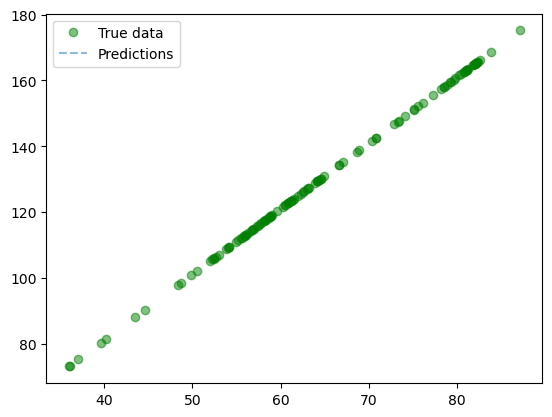

In [36]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()